In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import os

In [4]:
os.getcwd()

'C:\\Users\\ADMIN'

In [5]:
os.chdir('C:/Users/ADMIN/OneDrive/Desktop/ML Model')

In [6]:
os.listdir()

['holidays_events.csv',
 'oil.csv',
 'SALES REPORT SUMMARY.pptx',
 'sample_submission.csv',
 'stores.csv',
 'submission.csv',
 'test.csv',
 'train.csv',
 'transactions.csv']

LOADING DATASETS

In [7]:
train=pd.read_csv("train.csv")

In [8]:
test=pd.read_csv("test.csv")

In [9]:
stores=pd.read_csv("stores.csv")

In [10]:
holidays=pd.read_csv("holidays_events.csv")

In [11]:
oil=pd.read_csv("oil.csv")

In [12]:
transactions=pd.read_csv("transactions.csv")

In [13]:
sample=pd.read_csv("sample_submission.csv")

CONVERTING DATE COLUMNS

In [14]:
train['date'] = pd.to_datetime(train['date'])
test['date'] = pd.to_datetime(test['date'])
holidays['date'] = pd.to_datetime(holidays['date'])
oil['date'] = pd.to_datetime(oil['date'])
transactions['date'] = pd.to_datetime(transactions['date'])


MERGING EXTERNAL DATA COLUMNS INTO THE TRAIN AND TEST DATASET

In [15]:
train=train.merge(stores,on='store_nbr',how='left')
test=test.merge(stores,on='store_nbr',how='left')

In [16]:
train = train.merge(holidays, on='date', how='left')
test = test.merge(holidays, on='date', how='left')


In [17]:
train = train.merge(oil, on='date', how='left')
test = test.merge(oil, on='date', how='left')


In [18]:
train = train.merge(transactions, on=['date', 'store_nbr'], how='left')
test = test.merge(transactions, on=['date', 'store_nbr'], how='left')


In [19]:
train=train.rename(columns={'dcoilwtico':'oil_price'})

In [20]:
test=test.rename(columns={'dcoilwtico':'oil_price'})

In [21]:
train

,id,date,store_nbr,family,sales,onpromotion,city,state,type_x,cluster,type_y,locale,locale_name,description,transferred,oil_price,transactions
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False,NaN,NaN
1,1,2013-01-01,1,BABY CARE,0.000,0,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False,NaN,NaN
2,2,2013-01-01,1,BEAUTY,0.000,0,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False,NaN,NaN
3,3,2013-01-01,1,BEVERAGES,0.000,0,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False,NaN,NaN
4,4,2013-01-01,1,BOOKS,0.000,0,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3054343,3000883,2017-08-15,9,POULTRY,438.133,0,Quito,Pichincha,B,6,Holiday,Local,Riobamba,Fundacion de Riobamba,False,47.57,2155.0
3054344,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,Quito,Pichincha,B,6,Holiday,Local,Riobamba,Fundacion de Riobamba,False,47.57,2155.0
3054345,3000885,2017-08-15,9,PRODUCE,2419.729,148,Quito,Pichincha,B,6,Holiday,Local,Riobamba,Fundacion de Riobamba,False,47.57,2155.0
3054346,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,Quito,Pichincha,B,6,Holiday,Local,Riobamba,Fundacion de Riobamba,False,47.57,2155.0


In [22]:
test.describe

<bound method NDFrame.describe of             id       date  store_nbr                      family  onpromotion  \
0      3000888 2017-08-16          1                  AUTOMOTIVE            0   
1      3000889 2017-08-16          1                   BABY CARE            0   
2      3000890 2017-08-16          1                      BEAUTY            2   
3      3000891 2017-08-16          1                   BEVERAGES           20   
4      3000892 2017-08-16          1                       BOOKS            0   
...        ...        ...        ...                         ...          ...   
28507  3029395 2017-08-31          9                     POULTRY            1   
28508  3029396 2017-08-31          9              PREPARED FOODS            0   
28509  3029397 2017-08-31          9                     PRODUCE            1   
28510  3029398 2017-08-31          9  SCHOOL AND OFFICE SUPPLIES            9   
28511  3029399 2017-08-31          9                     SEAFOOD           

In [23]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3054348 entries, 0 to 3054347
Data columns (total 17 columns):
 #   Column        Dtype         
---  ------        -----         
 0   id            int64         
 1   date          datetime64[ns]
 2   store_nbr     int64         
 3   family        object        
 4   sales         float64       
 5   onpromotion   int64         
 6   city          object        
 7   state         object        
 8   type_x        object        
 9   cluster       int64         
 10  type_y        object        
 11  locale        object        
 12  locale_name   object        
 13  description   object        
 14  transferred   object        
 15  oil_price     float64       
 16  transactions  float64       
dtypes: datetime64[ns](1), float64(3), int64(4), object(9)
memory usage: 396.1+ MB


In [24]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            28512 non-null  int64         
 1   date          28512 non-null  datetime64[ns]
 2   store_nbr     28512 non-null  int64         
 3   family        28512 non-null  object        
 4   onpromotion   28512 non-null  int64         
 5   city          28512 non-null  object        
 6   state         28512 non-null  object        
 7   type_x        28512 non-null  object        
 8   cluster       28512 non-null  int64         
 9   type_y        1782 non-null   object        
 10  locale        1782 non-null   object        
 11  locale_name   1782 non-null   object        
 12  description   1782 non-null   object        
 13  transferred   1782 non-null   object        
 14  oil_price     21384 non-null  float64       
 15  transactions  0 non-null      float6

In [25]:
train.describe()

,id,date,store_nbr,sales,onpromotion,cluster,oil_price,transactions
count,3.054348e+06,3054348,3.054348e+06,3.054348e+06,3.054348e+06,3.054348e+06,2.099196e+06,2.805231e+06
mean,1.504277e+06,2015-04-26 12:11:45.717619200,2.750000e+01,3.590209e+02,2.617480e+00,8.481481e+00,6.801587e+01,1.697071e+03
min,0.000000e+00,2013-01-01 00:00:00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.619000e+01,5.000000e+00
25%,7.546768e+05,2014-03-01 00:00:00,1.400000e+01,0.000000e+00,0.000000e+00,4.000000e+00,4.641000e+01,1.046000e+03
50%,1.507572e+06,2015-04-28 12:00:00,2.750000e+01,1.100000e+01,0.000000e+00,8.500000e+00,5.343000e+01,1.395000e+03
75%,2.255120e+06,2016-06-22 00:00:00,4.100000e+01,1.960110e+02,0.000000e+00,1.300000e+01,9.581000e+01,2.081000e+03
max,3.000887e+06,2017-08-15 00:00:00,5.400000e+01,1.247170e+05,7.410000e+02,1.700000e+01,1.106200e+02,8.359000e+03
std,8.662610e+05,NaN,1.558579e+01,1.107286e+03,1.225494e+01,4.649735e+00,2.569134e+01,9.668317e+02


CHECKING FOR MISSING VALUES

In [26]:
train.isna().sum()

id                    0
date                  0
store_nbr             0
family                0
sales                 0
onpromotion           0
city                  0
state                 0
type_x                0
cluster               0
type_y          2551824
locale          2551824
locale_name     2551824
description     2551824
transferred     2551824
oil_price        955152
transactions     249117
dtype: int64

In [27]:
test.isna().sum()

id                  0
date                0
store_nbr           0
family              0
onpromotion         0
city                0
state               0
type_x              0
cluster             0
type_y          26730
locale          26730
locale_name     26730
description     26730
transferred     26730
oil_price        7128
transactions    28512
dtype: int64

FILLING MISSING VALUES IN REQUIRED COLUMNS

In [28]:
train['oil_price'] = train['oil_price'].fillna(train['oil_price'].median())
test['oil_price'] = test['oil_price'].fillna(test['oil_price'].median())
train['transactions'] = train['transactions'].fillna(0)
test['transactions'] = test['transactions'].fillna(0)


In [29]:
train.isna().sum()

id                    0
date                  0
store_nbr             0
family                0
sales                 0
onpromotion           0
city                  0
state                 0
type_x                0
cluster               0
type_y          2551824
locale          2551824
locale_name     2551824
description     2551824
transferred     2551824
oil_price             0
transactions          0
dtype: int64

In [30]:
test.isna().sum()

id                  0
date                0
store_nbr           0
family              0
onpromotion         0
city                0
state               0
type_x              0
cluster             0
type_y          26730
locale          26730
locale_name     26730
description     26730
transferred     26730
oil_price           0
transactions        0
dtype: int64

CREATING TIME BASED FEATURES

In [31]:
train['year'] = train['date'].dt.year
train['month'] = train['date'].dt.month
train['week'] = train['date'].dt.isocalendar().week
train['day'] = train['date'].dt.day
train['day_of_week'] = train['date'].dt.dayofweek

test['year'] = test['date'].dt.year
test['month'] = test['date'].dt.month
test['week'] = test['date'].dt.isocalendar().week
test['day'] = test['date'].dt.day
test['day_of_week'] = test['date'].dt.dayofweek

In [32]:
train=train.rename(columns={'id':'item_nbr'})

In [33]:
test=test.rename(columns={'id':'item_nbr'})

CREATING LAG FEATURES FOR THE TIME SERIES

In [34]:
train = train.sort_values(['store_nbr', 'item_nbr', 'date'])
train['lag_1'] = train.groupby(['store_nbr','item_nbr'])['sales'].shift(1)
train['lag_7'] = train.groupby(['store_nbr','item_nbr'])['sales'].shift(7)
train['lag_14'] = train.groupby(['store_nbr','item_nbr'])['sales'].shift(14)


ADDING ROLLING WINDOW FEATURE

In [35]:
train['roll_mean_7'] = train.groupby(['store_nbr','item_nbr'])['sales'].shift(1).rolling(7).mean()
train['roll_mean_30'] = train.groupby(['store_nbr','item_nbr'])['sales'].shift(1).rolling(30).mean()


TRAING ML MODEL LightGBM 

In [36]:
!pip install lightgbm

In [37]:
!pip install scikit-learn

In [38]:
import sklearn
print(sklearn.__version__)

1.7.2


In [39]:
import sys
print(sys.executable)


C:\Users\ADMIN\anaconda3\python.exe


In [40]:
!pip show scikit-learn

Name: scikit-learn
Version: 1.7.2
Summary: A set of python modules for machine learning and data mining
Home-page: https://scikit-learn.org
Author: 
Author-email: 
License-Expression: BSD-3-Clause
Location: C:\Users\ADMIN\anaconda3\Lib\site-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: 


In [41]:
cat_cols = ['family', 'city', 'state', 'type_x', 'type_y', 'locale', 'locale_name', 'transferred']

In [42]:
for col in cat_cols:
    if col in train.columns:
        train[col] = train[col].astype('category')
    if col in test.columns:
        test[col] = test[col].astype('category')


In [43]:
train.head()

,item_nbr,date,store_nbr,family,sales,onpromotion,city,state,type_x,cluster,...,year,month,week,day,day_of_week,lag_1,lag_7,lag_14,roll_mean_7,roll_mean_30
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,Quito,Pichincha,D,13,...,2013,1,1,1,1,NaN,NaN,NaN,NaN,NaN
1,1,2013-01-01,1,BABY CARE,0.0,0,Quito,Pichincha,D,13,...,2013,1,1,1,1,NaN,NaN,NaN,NaN,NaN
2,2,2013-01-01,1,BEAUTY,0.0,0,Quito,Pichincha,D,13,...,2013,1,1,1,1,NaN,NaN,NaN,NaN,NaN
3,3,2013-01-01,1,BEVERAGES,0.0,0,Quito,Pichincha,D,13,...,2013,1,1,1,1,NaN,NaN,NaN,NaN,NaN
4,4,2013-01-01,1,BOOKS,0.0,0,Quito,Pichincha,D,13,...,2013,1,1,1,1,NaN,NaN,NaN,NaN,NaN


In [44]:
from lightgbm import LGBMRegressor

features = [col for col in train.columns if col not in ['sales','date','description']]  # drop description
X = train[features]
y = train['sales']

model = LGBMRegressor(
    n_estimators=2000,
    learning_rate=0.05,
    max_depth=-1,
    subsample=0.8,
    colsample_bytree=0.8
)

# Tell LightGBM which features are categorical
cat_features = [col for col in X.columns if str(X[col].dtype)=='category']

model.fit(X, y, categorical_feature=cat_features)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.462363 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1531
[LightGBM] [Info] Number of data points in the train set: 3054348, number of used features: 20
[LightGBM] [Info] Start training from score 359.020892


,boosting_type,'gbdt'
,num_leaves,31
,max_depth,-1
,learning_rate,0.05
,n_estimators,2000
,subsample_for_bin,200000
,objective,None
,class_weight,None
,min_split_gain,0.0
,min_child_weight,0.001
,min_child_samples,20


In [45]:

max_lag = 28 

last_train = train[['store_nbr','item_nbr','date','sales']].sort_values(['store_nbr','item_nbr','date'])
last_days = last_train.groupby(['store_nbr','item_nbr']).tail(max_lag)


In [46]:
test_combined = pd.concat([last_days, test], sort=False)
test_combined = test_combined.sort_values(['store_nbr','item_nbr','date'])


In [47]:
lags = [1,7,14,28]
for lag in lags:
    test_combined[f'lag_{lag}'] = test_combined.groupby(['store_nbr','item_nbr'])['sales'].shift(lag)


windows = [7,14,30]
for w in windows:
    test_combined[f'roll_mean_{w}'] = test_combined.groupby(['store_nbr','item_nbr'])['sales'].shift(1).rolling(w).mean()


In [51]:
# Maximum lag you used
max_lag = 28

# Take last 28 days of train for each store/item
last_train = train[['store_nbr','item_nbr','date','sales']].sort_values(['store_nbr','item_nbr','date'])
last_days = last_train.groupby(['store_nbr','item_nbr']).tail(max_lag)

# Combine last train days with test
test_combined = pd.concat([last_days, test], sort=False)
test_combined = test_combined.sort_values(['store_nbr','item_nbr','date'])


In [52]:
lags = [1,7,14,28]
windows = [7,14,30]

for lag in lags:
    test_combined[f'sales_lag_{lag}'] = test_combined.groupby(['store_nbr','item_nbr'])['sales'].shift(lag)

for w in windows:
    test_combined[f'roll_mean_{w}'] = test_combined.groupby(['store_nbr','item_nbr'])['sales'].shift(1).rolling(w).mean()


In [53]:
# Numeric columns
num_cols = test_combined.select_dtypes(include=['float64','int64']).columns.tolist()
test_combined[num_cols] = test_combined[num_cols].fillna(0)

# Categorical columns
cat_cols = test_combined.select_dtypes(include=['category']).columns.tolist()
for col in cat_cols:
    if test_combined[col].isna().sum() > 0:
        test_combined[col] = test_combined[col].cat.add_categories('unknown')
        test_combined[col] = test_combined[col].fillna('unknown')


In [55]:
import pandas as pd
df = pd.read_csv("submission.csv")
df.head()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      28512 non-null  int64  
 1   sales   28512 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 445.6 KB


In [57]:
train['date'].min(), train['date'].max()


(Timestamp('2013-01-01 00:00:00'), Timestamp('2017-08-15 00:00:00'))

In [58]:
val_start = train['date'].max() - pd.Timedelta(days=30)


In [59]:
# Remove non-numeric columns from features
features = [f for f in features if train[f].dtype in ['int64', 'float64', 'bool']]


In [60]:
train[features].dtypes


item_nbr          int64
store_nbr         int64
onpromotion       int64
cluster           int64
oil_price       float64
transactions    float64
lag_1           float64
lag_7           float64
lag_14          float64
roll_mean_7     float64
roll_mean_30    float64
dtype: object

In [61]:
train[features].dtypes[train[features].dtypes == 'object']


Series([], dtype: object)

In [62]:
bad_features = list(train[features].dtypes[train[features].dtypes == 'object'].index)
print("Bad (object) features:", bad_features)

# Remove them
features = [f for f in features if f not in bad_features]


Bad (object) features: []


In [63]:
train[features].dtypes


item_nbr          int64
store_nbr         int64
onpromotion       int64
cluster           int64
oil_price       float64
transactions    float64
lag_1           float64
lag_7           float64
lag_14          float64
roll_mean_7     float64
roll_mean_30    float64
dtype: object

In [64]:
# Remove non-numeric columns from features
features = [f for f in features if train[f].dtype in ['int64', 'float64', 'bool']]


In [65]:
from sklearn.preprocessing import LabelEncoder

# Combine train + test so encoding is consistent
full = pd.concat([train, test_combined], axis=0, ignore_index=True)

# Detect object columns
object_cols = full.select_dtypes(include='object').columns
print("Object columns:", list(object_cols))

# Encode each object column
for col in object_cols:
    le = LabelEncoder()
    full[col] = le.fit_transform(full[col].astype(str))

# Split back the encoded data
train = full.iloc[:len(train)]
test_combined = full.iloc[len(train):]


Object columns: ['family', 'city', 'state', 'type_x', 'type_y', 'locale', 'locale_name', 'description', 'transferred']


In [66]:
features = [col for col in train.columns if col not in ['sales', 'date']]


In [67]:
model = LGBMRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=-1,
    subsample=0.7,
    colsample_bytree=0.8,
    random_state=42
)

model.fit(train[features], train['sales'])


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.240477 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1628
[LightGBM] [Info] Number of data points in the train set: 3054348, number of used features: 21
[LightGBM] [Info] Start training from score 359.020892


,boosting_type,'gbdt'
,num_leaves,31
,max_depth,-1
,learning_rate,0.05
,n_estimators,500
,subsample_for_bin,200000
,objective,None
,class_weight,None
,min_split_gain,0.0
,min_child_weight,0.001
,min_child_samples,20


In [68]:
val_start = '2017-07-15'    # example
val = train[train['date'] >= val_start].copy()
val['predicted'] = model.predict(val[features])


(55242, 32)


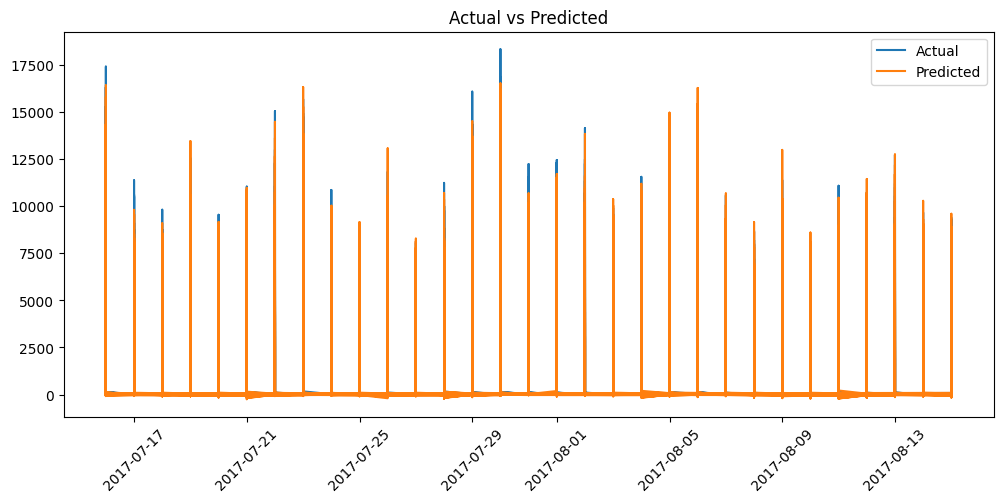

In [69]:
# find last 30 days as validation
last_date = train['date'].max()
val_start = last_date - pd.Timedelta(days=30)

val = train[train['date'] >= val_start].copy()

print(val.shape)  # must not be (0, X)

val['predicted'] = model.predict(val[features])

# Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(val['date'], val['sales'], label='Actual')
plt.plot(val['date'], val['predicted'], label='Predicted')
plt.legend()
plt.xticks(rotation=45)
plt.title("Actual vs Predicted")
plt.show()


In [70]:
from sklearn.metrics import mean_squared_error
import numpy as np


In [71]:
mse = mean_squared_error(val['sales'], val['predicted'])
print("MSE:", mse)


MSE: 50148.431698595115


In [72]:
rmse = np.sqrt(mse)
print("RMSE:", rmse)


RMSE: 223.9384551580972
